# setup

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import collections
import os
FIG_SAVE_PATH = os.path.abspath('../../report/figures')

In [2]:
data = pd.read_csv('../../data/raw/train.csv').drop(['id'], axis=1)
print("Total number of comments: {}".format(data['comment_text'].count()))

Total number of comments: 159571


### DATA: split into 3 subsets of comments, according to the class: non-toxic, toxic and severe toxic

In [3]:
non_toxic_comment = data.loc[(data["toxic"]==0) & (data["severe_toxic"]==0)] 
toxic_comment = data.loc[(data["toxic"]==1) & (data["severe_toxic"]==0)]
severe_toxic_comment = data.loc[(data["toxic"]==1) & (data["severe_toxic"]==1)]

### PLOT: Distribution of 3 classes (non-toxic, toxic and severe toxic) comments

Number

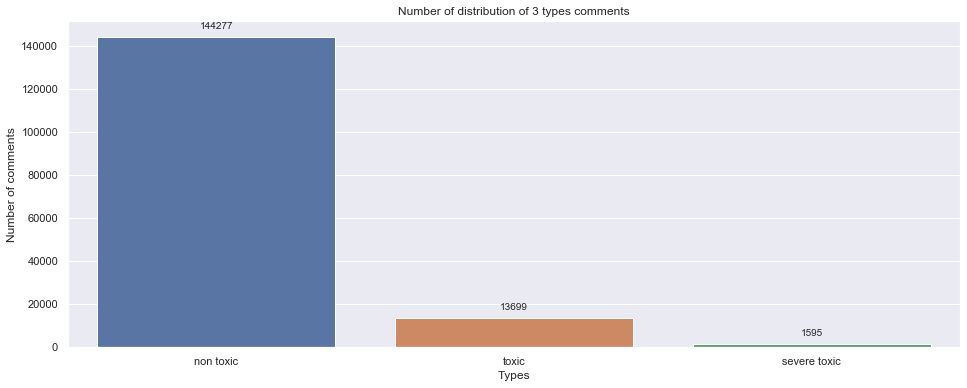

In [4]:
comment_type_df = pd.melt(pd.DataFrame({'non toxic': non_toxic_comment['comment_text'].count(),
                                'toxic': toxic_comment['comment_text'].count(),
                                'severe toxic': severe_toxic_comment['comment_text'].count()},index=[0]))

plt.figure(figsize=(16, 6))
comment_type_ax = sns.barplot(x = comment_type_df.variable, y = comment_type_df.value)
plt.xlabel("Types")
plt.ylabel("Number of comments")
plt.title("Number of distribution of 3 types comments")

total = len(data['comment_text'])
for p in comment_type_ax.patches:
    comment_type_ax.annotate("%g" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Number of comments in each class.png') 
plt.show()

Normalized

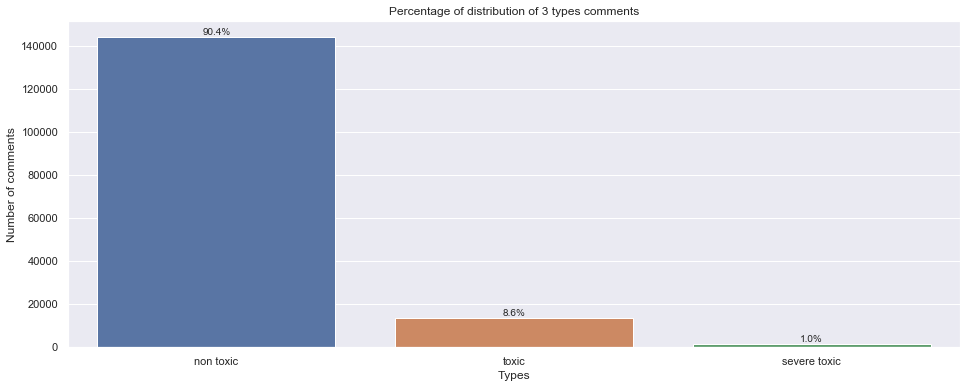

In [5]:
comment_type_df = pd.melt(pd.DataFrame({'non toxic': non_toxic_comment['comment_text'].count(),
                                'toxic': toxic_comment['comment_text'].count(),
                                'severe toxic': severe_toxic_comment['comment_text'].count()},index=[0]))

plt.figure(figsize=(16, 6))
comment_type_ax = sns.barplot(x = comment_type_df.variable, y = comment_type_df.value)
plt.xlabel("Types")
plt.ylabel("Number of comments")
plt.title("Percentage of distribution of 3 types comments")

total = len(data['comment_text'])
for p in comment_type_ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    comment_type_ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom')
    
plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Percentage of comments in each class.png') 
plt.show()

# Distribution of toxicity type in non toxic comments

Number

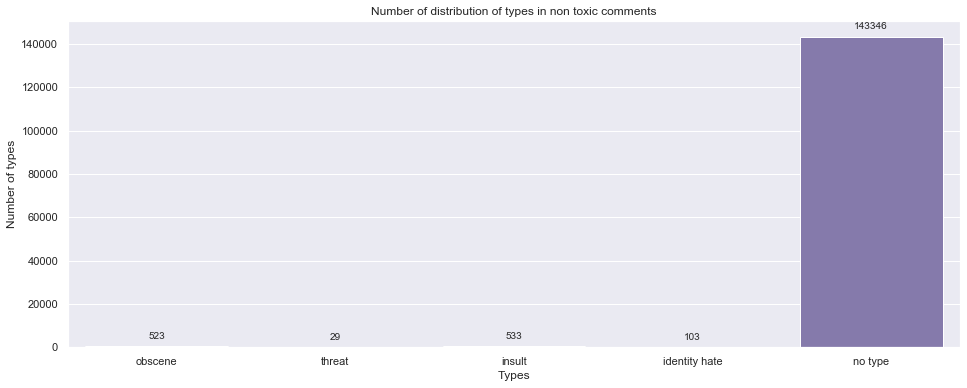

In [6]:
non_toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (non_toxic_comment['obscene']==1).sum(),
                                         'threat': (non_toxic_comment['threat']==1).sum(),
                                         'insult': (non_toxic_comment['insult']==1).sum(),
                                         'identity hate': (non_toxic_comment['identity_hate']==1).sum(),
                                         'no type': ((non_toxic_comment['obscene']==0)&(non_toxic_comment['threat']==0)&(non_toxic_comment['insult']==0)&(non_toxic_comment['identity_hate']==0)).sum()},index=[0]))
plt.figure(figsize=(16, 6))
NTC_ax = sns.barplot(x = non_toxic_comment_df.variable, y = non_toxic_comment_df.value)
plt.xlabel("Types")
plt.ylabel("Number of types")
plt.title("Number of distribution of types in non toxic comments")

total = len(non_toxic_comment['comment_text'])
for p in NTC_ax.patches:
    NTC_ax.annotate("%g" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Number of distribution of types in non toxic comments.png') 
plt.show()

Normalized

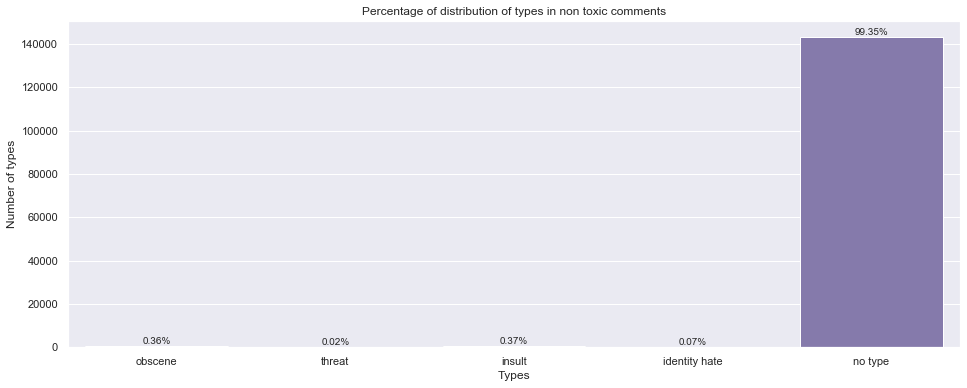

In [7]:
non_toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (non_toxic_comment['obscene']==1).sum(),
                                         'threat': (non_toxic_comment['threat']==1).sum(),
                                         'insult': (non_toxic_comment['insult']==1).sum(),
                                         'identity hate': (non_toxic_comment['identity_hate']==1).sum(),
                                         'no type': ((non_toxic_comment['obscene']==0)&(non_toxic_comment['threat']==0)&(non_toxic_comment['insult']==0)&(non_toxic_comment['identity_hate']==0)).sum()},index=[0]))
plt.figure(figsize=(16, 6))
NTC_ax = sns.barplot(x = non_toxic_comment_df.variable, y = non_toxic_comment_df.value)
plt.xlabel("Types")
plt.ylabel("Number of types")
plt.title("Percentage of distribution of types in non toxic comments")

total = len(non_toxic_comment['comment_text'])
for p in NTC_ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    NTC_ax.annotate('{:.2f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom')
    
plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Percentage of distribution of types in non toxic comments.png') 
plt.show()

# Distribution of toxicity type in toxic comments

Number

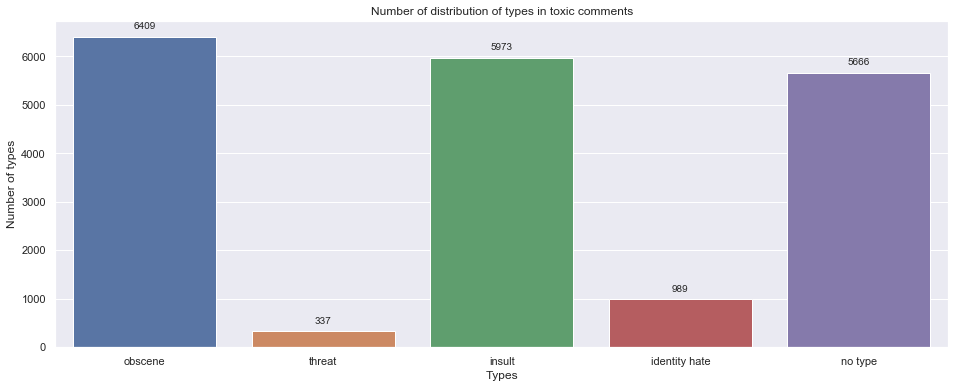

In [8]:
toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (toxic_comment['obscene']==1).sum(),
                                         'threat': (toxic_comment['threat']==1).sum(),
                                         'insult': (toxic_comment['insult']==1).sum(),
                                         'identity hate': (toxic_comment['identity_hate']==1).sum(),
                                         'no type': ((toxic_comment['obscene']==0)&(toxic_comment['threat']==0)&(toxic_comment['insult']==0)&(toxic_comment['identity_hate']==0)).sum()},index=[0]))
plt.figure(figsize=(16, 6))
TC_ax = sns.barplot(x = toxic_comment_df.variable, y = toxic_comment_df.value)
plt.xlabel("Types")
plt.ylabel("Number of types")
plt.title("Number of distribution of types in toxic comments")

total = len(toxic_comment['comment_text'])
for p in TC_ax.patches:
    TC_ax.annotate("%g" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Number of distribution of types in toxic comments.png') 
plt.show()

Normalized

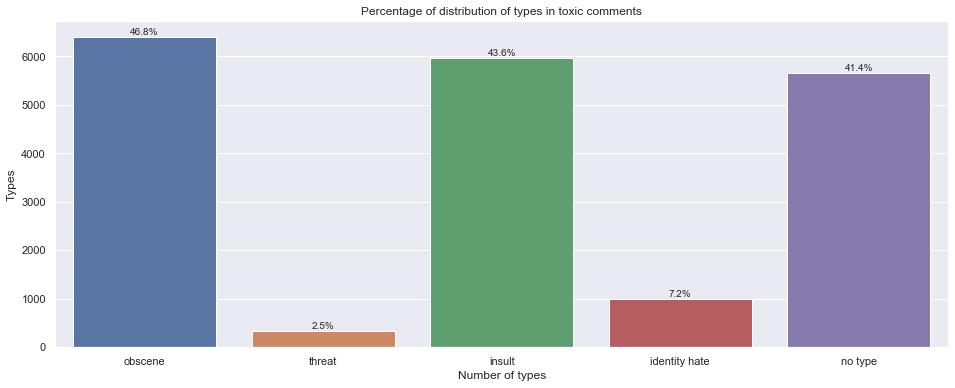

In [9]:
toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (toxic_comment['obscene']==1).sum(),
                                         'threat': (toxic_comment['threat']==1).sum(),
                                         'insult': (toxic_comment['insult']==1).sum(),
                                         'identity hate': (toxic_comment['identity_hate']==1).sum(),
                                        'no type': ((toxic_comment['obscene']==0)&(toxic_comment['threat']==0)&(toxic_comment['insult']==0)&(toxic_comment['identity_hate']==0)).sum()},index=[0]))

plt.figure(figsize=(16, 6))
TC_ax = sns.barplot(x = toxic_comment_df.variable, y = toxic_comment_df.value)
plt.xlabel("Number of types")
plt.ylabel("Types")
plt.title("Percentage of distribution of types in toxic comments")

total = len(toxic_comment['comment_text'])
for p in TC_ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    TC_ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom')
    
plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Percentage of distribution of types in toxic comments.png') 
plt.show()

# Distribution of toxicity type in severe toxic comments

Number

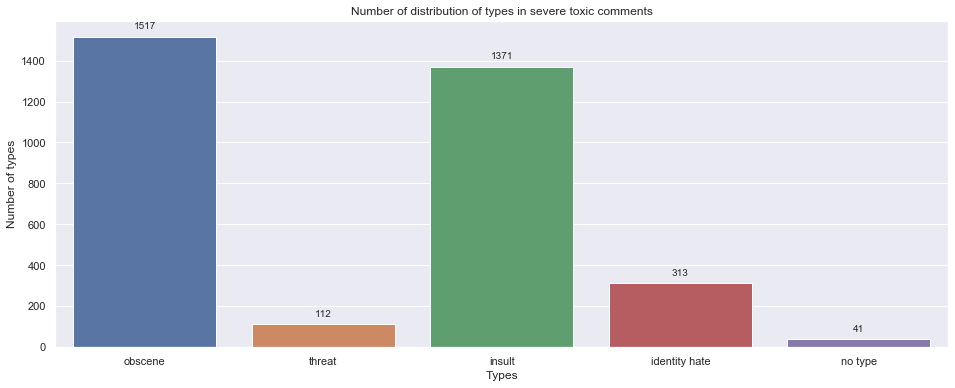

In [10]:
severe_toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (severe_toxic_comment['obscene']==1).sum(),
                                         'threat': (severe_toxic_comment['threat']==1).sum(),
                                         'insult': (severe_toxic_comment['insult']==1).sum(),
                                         'identity hate': (severe_toxic_comment['identity_hate']==1).sum(),
                                         'no type': ((severe_toxic_comment['obscene']==0)&(severe_toxic_comment['threat']==0)&(severe_toxic_comment['insult']==0)&(severe_toxic_comment['identity_hate']==0)).sum()},index=[0]))
plt.figure(figsize=(16, 6))
STC_ax = sns.barplot(x = severe_toxic_comment_df.variable, y = severe_toxic_comment_df.value)
plt.xlabel("Types")
plt.ylabel("Number of types")
plt.title("Number of distribution of types in severe toxic comments")


total = len(severe_toxic_comment['comment_text'])
for p in STC_ax.patches:
    STC_ax.annotate("%g" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Number of distribution of types in severe toxic comments.png')    
plt.show()


Normalized

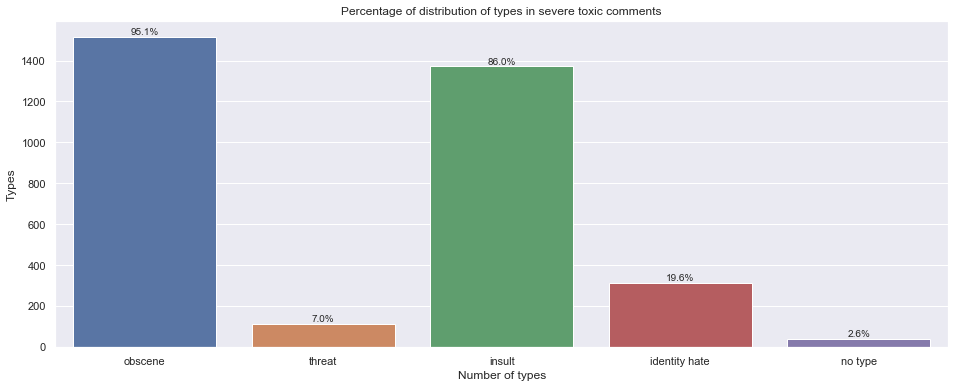

In [11]:
severe_toxic_comment_df = pd.melt(pd.DataFrame({'obscene': (severe_toxic_comment['obscene']==1).sum(),
                                         'threat': (severe_toxic_comment['threat']==1).sum(),
                                         'insult': (severe_toxic_comment['insult']==1).sum(),
                                         'identity hate': (severe_toxic_comment['identity_hate']==1).sum(),
                                         'no type': ((severe_toxic_comment['obscene']==0)&(severe_toxic_comment['threat']==0)&(severe_toxic_comment['insult']==0)&(severe_toxic_comment['identity_hate']==0)).sum()},index=[0]))
plt.figure(figsize=(16, 6))
STC_ax = sns.barplot(x = severe_toxic_comment_df.variable, y = severe_toxic_comment_df.value)
plt.xlabel("Number of types")
plt.ylabel("Types")
plt.title("Percentage of distribution of types in severe toxic comments")

total = len(severe_toxic_comment['comment_text'])
for p in STC_ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    STC_ax.annotate('{:.1f}%'.format(100.*y/total), (x.mean(), y), ha='center', va='bottom')
    
plt.savefig(FIG_SAVE_PATH+'/Train data visualization/Percentage of distribution of types in severe toxic comments.png') 
plt.show()


## Correlation of variables

In [11]:
# calculate the correlation matrix
corr = data.corr()

cmap=sns.diverging_palette(240, 10, n=9, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Table of variable correlation")\
    .set_precision(3)\
    .set_table_styles(magnify())

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1,0.309,0.677,0.157,0.648,0.266
severe_toxic,0.309,1,0.403,0.124,0.376,0.202
obscene,0.677,0.403,1,0.141,0.741,0.287
threat,0.157,0.124,0.141,1,0.15,0.115
insult,0.648,0.376,0.741,0.15,1,0.338
identity_hate,0.266,0.202,0.287,0.115,0.338,1


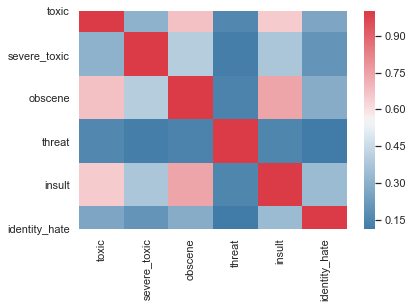

In [7]:
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns,cmap=cmap)
plt.savefig('Variable correlation heatmap.png') 